<a href="https://colab.research.google.com/github/zahra370/DL_assignments/blob/main/zahra_khan_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  importing Libraries
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import uniform_filter

  
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np



170498071/170498071 [==============================] - 5s 0us/step
Images Shape: (50000, 32, 32, 3)
Labels Shape: (50000, 1)
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
labels4 (5000, 1)
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
labels6 (5000, 1)


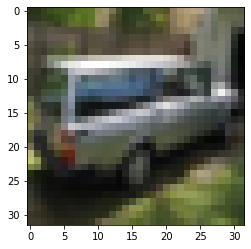

In [2]:
# importing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()

print('Images Shape: {}'.format(train_images.shape))
print('Labels Shape: {}'.format(train_labels.shape))

# extraction class 5 deer 
idx = (train_labels == 0).reshape(train_images.shape[0])
print('Index Shape: {}'.format(idx.shape))
filtered_images4 = train_images[idx]
print('Filtered Images Shape: {}'.format(filtered_images4.shape))
plt.imshow(filtered_images4[150])
# extracting labels for class4
labels_c4 = train_labels[idx]
print('labels4',labels_c4.shape)


# extracting class 6 frog

idx = (train_labels == 1).reshape(train_images.shape[0])
print('Index Shape: {}'.format(idx.shape))
filtered_images6 = train_images[idx]
print('Filtered Images Shape: {}'.format(filtered_images6.shape))
plt.imshow(filtered_images6[200])

# extracting labels for class6

labels_c6 = train_labels[idx]
print('labels6',labels_c6.shape)



In [3]:
# extracting first 20 images from class4

class4_img = filtered_images4[:20]
print(class4_img.shape)
class6_img = filtered_images6[:20]
print(class6_img.shape)
c4_labels = labels_c4[:20]
print(c4_labels.shape)
c6_labels = labels_c6[:20]
print(c6_labels.shape)

(20, 32, 32, 3)
(20, 32, 32, 3)
(20, 1)
(20, 1)


In [4]:
# splitting data into train and test set

X_train_c4 = class4_img[:12]
X_train_c6 = class6_img[:12]
X_TRAIN = np.concatenate((X_train_c4, X_train_c6))
print('xtrain',X_TRAIN.shape)

X_val_c4 = class4_img[12:16]
X_val_c6 = class6_img[12:16]
X_VAL = np.concatenate((X_val_c4, X_val_c6))
print('xval',X_VAL.shape)

X_test_c4 = class4_img[16:]
X_test_c6 = class6_img[16:]
X_TEST = np.concatenate((X_test_c4, X_test_c6))
print('xtest',X_TEST.shape)

Y_train_c4 = c4_labels[:12]
Y_train_c6 = c6_labels[:12]
Y_TRAIN = np.concatenate((Y_train_c4, Y_train_c6))
print('ytrain',Y_TRAIN.shape)

Y_val_c4 = c4_labels[12:16]
Y_val_c6 = c6_labels[12:16]
Y_VAL = np.concatenate((Y_val_c4, Y_val_c6))
print('yval',Y_VAL.shape)

Y_test_c4 = c4_labels[16:]
Y_test_c6 = c6_labels[16:]
Y_TEST = np.concatenate((Y_test_c4, Y_test_c6))
print('ytest',Y_TEST.shape)

xtrain (24, 32, 32, 3)
xval (8, 32, 32, 3)
xtest (8, 32, 32, 3)
ytrain (24, 1)
yval (8, 1)
ytest (8, 1)


In [5]:

# Standardize data to have feature values between 0 and 1.
x_train = X_TRAIN/255.
x_val = X_VAL/255.
x_test = X_TEST/255.

print('xtrain',x_train.shape)
print('xval',x_val.shape)
print('xtest',x_test.shape)

y_train = Y_TRAIN.reshape(-1,)
y_val = Y_VAL.reshape(-1,)
y_test = Y_TEST.reshape(-1,)
print('ytrain',y_train.shape)
print('yval',y_val.shape)
print('ytest',y_test.shape)


xtrain (24, 32, 32, 3)
xval (8, 32, 32, 3)
xtest (8, 32, 32, 3)
ytrain (24,)
yval (8,)
ytest (8,)


In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(10, activation='LeakyReLU'),
        layers.Dense(10, activation='LeakyReLU'),
        layers.Dense(5, activation='LeakyReLU'),
        layers.Dense(1, activation='sigmoid')    
    ])

ann.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

his = ann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 569ms/step - loss: 0.7601 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 0.7221 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6761 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6516 - accuracy: 0.5417
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6344 - accuracy: 0.8333
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6220 - accuracy: 0.7917
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6013 - accuracy: 0.7917
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.5844 - accuracy: 0.8750


In [10]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_val)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_val, y_pred_classes))

1/1 [==============================] - 0s 72ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

1/1 [==============================] - 0s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# X_train, X_test, Y_train, Y_test = train_test_split(images2, labels, test_size = 0.2, stratify = labels, random_state = 2)



import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn import datasets

from sklearn.model_selection import train_test_split

import skimage.io as io

from sklearn.utils import shuffle

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

learning = MLPClassifier(hidden_layer_sizes=(10,10,5), activation='relu', solver='adam', max_iter=1000)

train_x_flatten = x_train.reshape(x_train.shape[0], -1)
test_x_flatten = x_test.reshape(x_test.shape[0], -1)

learning.fit(train_x_flatten,y_train)

Training_Prediction = learning.predict(train_x_flatten)

Testing_Prediction = learning.predict(test_x_flatten)


print(classification_report(y_train ,Training_Prediction))

print(classification_report(y_test ,Testing_Prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.00      0.00      0.00         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8

